# Exercise 1

Create a model using K-Nearest Neigbors to perform classification using the personality dataset.

0 -'introvert'

1 - 'extrovert'

## A. Import libraries

In [15]:
import sklearn
import pandas as pd
df = pd.read_excel("data.xlsx")
df.head()
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

## B. Load and understand the dataset

Display the first 5 rows of the dataset using `.head()`

In [16]:
# Converts xlsx to dataframe
df = pd.read_excel("data.xlsx", header=None)
df.head()

,0,1,2,3,4,5
0,Joshua,0,1,0,1400,1
1,James,0,1,0,146,0
2,Ryan,0,1,0,674,1
3,Jasmine,1,1,1,1000,1
4,Czar,1,1,1,4100,1


Display the summary of all the features of the dataset using `.info()`

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       100 non-null    object
 1   1       100 non-null    int64 
 2   2       100 non-null    int64 
 3   3       100 non-null    int64 
 4   4       100 non-null    int64 
 5   5       100 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 4.8+ KB


Display the total number of samples from each label using `.value_counts()`

In [18]:
df.value_counts()

,,,,,,count
0,1,2,3,4,5,
Adre,1,1,0,256,0,1
Adrian,0,0,1,369,0,1
Alex,1,1,1,2540,1,1
Aron,1,1,0,383,0,1
Aron Christian,1,0,0,1400,1,1
...,...,...,...,...,...,...
Von,0,1,1,1000,1,1
Walter,0,0,1,260,0,1
Wil,0,1,0,470,0,1


Use a histogram to display the number of followers for each samples
 - The x axis should be the number of followers/friends
 - The y axis should be the number of samples in the dataset

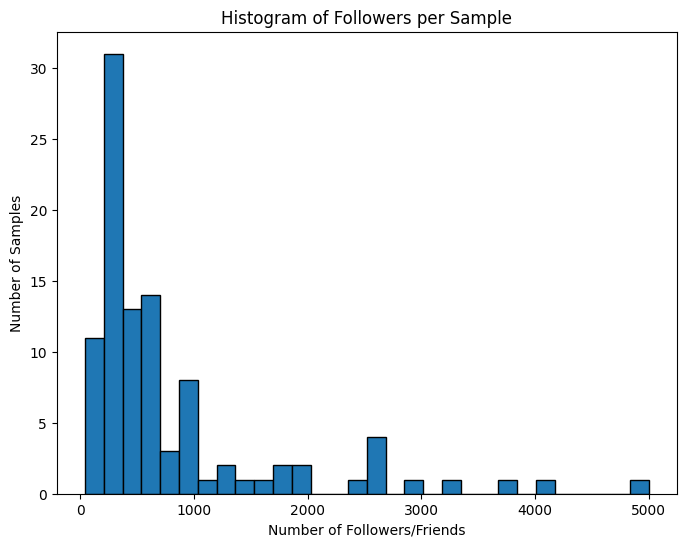

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Example: Load your dataset
# Replace 'your_dataset.csv' with your actual dataset file
df = pd.read_excel("data.xlsx")
# Use the correct column name or index for followers/friends
# Based on df.head(), the followers column is the 5th column (index 4) after dropping the name column
followers = df.iloc[:, 4]

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(followers, bins=30, edgecolor='black')
plt.xlabel("Number of Followers/Friends")
plt.ylabel("Number of Samples")
plt.title("Histogram of Followers per Sample")
plt.show()

Remove the name column using `drop()` method

In [20]:
df = df.drop(columns=[0])

## C. Split the dataset into training and test set

Convert the features into an numpy array using `.values()` and store it in a variable "X"

In [21]:
df = df.drop(columns=['Joshua'])
df.head()

,1,0.1,1400,1.1
0,1,0,146,0
1,1,0,674,1
2,1,1,1000,1
3,1,1,4100,1
4,0,1,127,0


In [22]:
X = df.values

Convert the labels into an numpy array using `.values()` and store it in a variable "y"

In [23]:
y = df.iloc[:, -1].values

Use `train_test_split()` to split the data.

- Declare a variable `X_train` that will hold the training data
- Declare a variable `X_test` that will hold the test data
- Declare a variable `y_train` that will hold the label of the training data
- Declare a variable `y_test` that will hold the label of the test data


In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Display the dimensions of each variables using `.shape()`

In [25]:
print("df shape:", df.shape)
print("X shape:", X.shape)
print("y shape:", y.shape)


df shape: (99, 4)
X shape: (99, 4)
y shape: (99,)


## D. Create the model

Use KNN as a classifier by using `KNeighborsClassifier()`

In [26]:
knn = KNeighborsClassifier(n_neighbors=13)


Train the model using the `.fit()`

In [27]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

Test the model using the `.predict()`

In [28]:
from sklearn.neighbors import KNeighborsClassifier

# Example KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on your training data
knn.fit(X_train, y_train)

# Now you can predict
y_pred = knn.predict(X_test)

## E. Evaluate the model

Create a confusion matrix

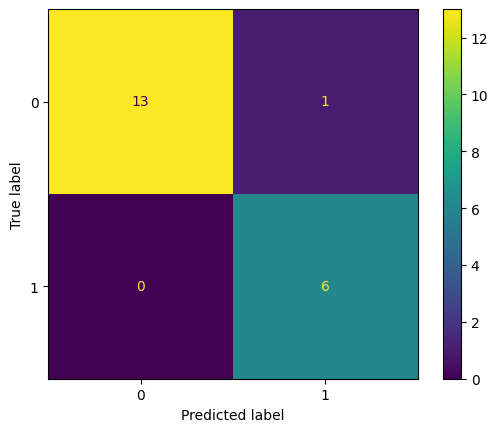

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Load your dataframe
# df = pd.read_csv("your_file.csv")  # if from file

# Assuming your dataset looks like the snippet:
# First column = names (string), others = numeric features
# The variables X and y are already defined in previous cells and contain the correct data.
# No need to redefine them here.

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Initialize and fit the KNN model
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict
y_pred = knn.predict(X_test)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred, labels=knn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix,
                              display_labels=knn.classes_)
disp.plot()

Display the accuracy

In [30]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.95


Display the precision

In [31]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred)
print("Precision:", precision)

Precision: 0.8571428571428571


Display the recall

In [32]:
from sklearn.metrics import recall_score

recall = recall_score(y_test, y_pred)
print("Recall:", recall)

Recall: 1.0


Display the f1-score

In [33]:
from sklearn.metrics import f1_score

f1 = f1_score(y_test, y_pred)
print("F1-score:", f1)

F1-score: 0.9230769230769231


## F. Predict your own personality

Enter your own features and use the model to generate a prediction using `.predict()`

In [35]:
# Example: Replace with your own features
# Based on the training data, the features are the columns after the name and before the last column (the label).
# The features are likely the three binary features and the followers count.
my_features = np.array([[0, 1, 1, 500]])  # shape must be (1, 4) to match the training data
my_prediction = knn.predict(my_features)
print("Predicted personality:", "extrovert" if my_prediction[0] == 1 else "introvert")

Predicted personality: introvert
